## Final Project Submission

Please fill out:
* Student name: Anila Qureshi
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Dave Baker
* Blog post URL:


# When it comes to valuing a property, what features of real estate can best predict the price?
## It can be as simple as a google search or just guessing. *BUT* the best approach here is to explore the data and find the most accurate way to best predict these features. Here our methodology includes creating a baseline model from a dataset that focuses on houses within King County, Washington. 
## From the baseline model there will be further analysis conducted in order to make better assumptions on whether the model created improves with certain house features. Since house features are so different it is important to try and normalise them in order to give an accurate analysis on the predictions made. This will be followed by multiple regression to check for multicollinearity and lastly we will do  model fit and validation to cross check. 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest
import statsmodels.api as sm

%matplotlib inline

In [2]:
data = pd.read_csv('./raw_data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Here we have read in the housing dataset for King county. The 21 columns represent the categories associated with each house listed.  Just from looking at this dataframe I know that price is our target dependent variable and the rest of the columns form a relationship with price. Not all of the columns will affect house price equally. We are focused on finding the strongest ones. 

In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Describe helps to take a closer look at the dataset. Here it's important to see that there are 21,597 homes within our dataframe. It's easy to get a good overview on the average for each column along with its minimum, maximum etc. 

In [4]:
data.info() #Gives us an overview of how each column is classified. 
#This helps to convert certain columns so that it is easier to run tests. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Because price is our target variable, we will remove it from our dataset. This helps to focus on variables. 

In [5]:
X=data.drop('price', axis=1)
y=data['price'].astype(int)

Here I have made a logical assumptions that the number of bedrooms, bathrooms, square foot living and the square foot lot have an impact on price. I have looked at them individually to see about outliers, and average size of each. 

In [6]:
data['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [7]:
data['bathrooms'].describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [8]:
data['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [9]:
data['sqft_lot'].describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

## My baseline model will include these features. This is important because as we further analyse and create a new model we can refer back to this one below to see if there is a change in value. We start off with 6 variables. It is important to note that too many variables can cause an issue with multicollinearity so our new model will be reduced further. The new model will specifically be the strongest variables from the baseline model. 

In [10]:
x_mult_coef= data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']]
x_mult_coef=sm.add_constant(x_mult_coef)
x_mult_coef.head()

/Users/marwankalo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement
0,1.0,3,1.00,1180,5650,1180,0.0
1,1.0,3,2.25,2570,7242,2170,400.0
2,1.0,2,1.00,770,10000,770,0.0
3,1.0,4,3.00,1960,5000,1050,910.0
4,1.0,3,2.00,1680,8080,1680,0.0


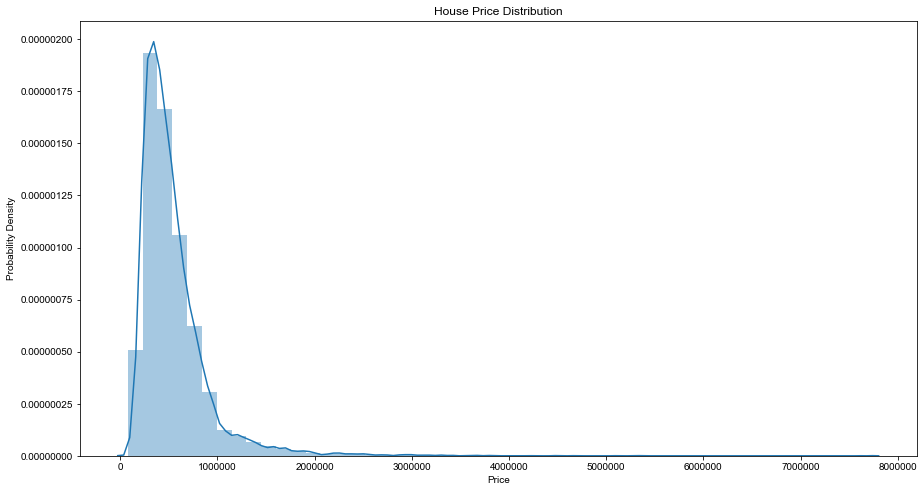

In [11]:
plt.figure(figsize=(15,8))
sns.distplot(data['price']);
sns.set_style('white')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.title('House Price Distribution')
plt.show()

## Here is a distribution plot on house prices in King County. A majority of houses prices fall around ## 500,000.00 USD with the exception of some outliers that are 78,000 and 8,000,000.00

## My next step is to look at the variables individually against price. From below I can make the assumption based on the data that square foot living, bathrooms, and square foot above are very strong. 

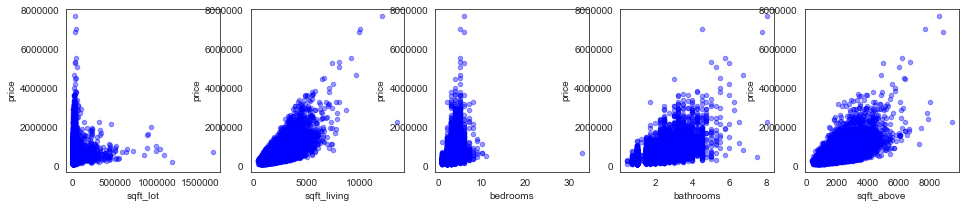

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3)) #it's important to note that I know I have not included
#the basement plot in ncols, sometimes it works when 6 is put in, but most of the time i get an error, so i have put
# 5 as default. 

for xcol, ax in zip(['sqft_lot', 'sqft_living', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

## Just to be sure I will look at each figure in a histogram format to check the distribution. 

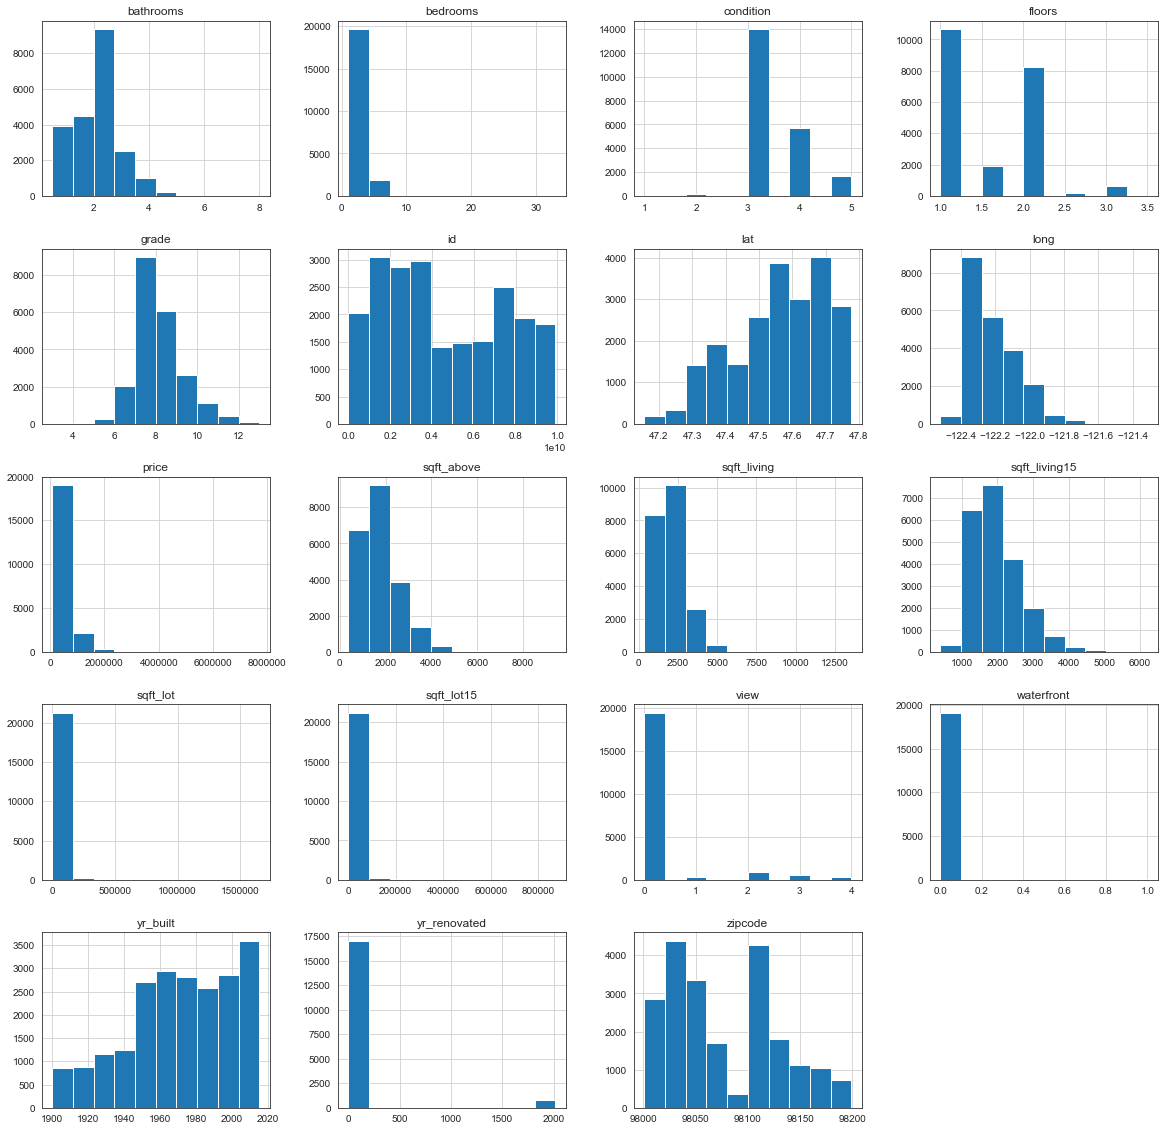

In [13]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data.hist(ax = ax);

In [14]:
data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above','sqft_basement']].nunique()
#Chekcing unique numbers in order to see whether I need to categorise any of the variables chosen


bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
sqft_above        942
sqft_basement     304
dtype: int64

In [15]:
data['bedbath']=data['bedrooms']+data['bathrooms'] #may be easier to combine bed and bath as one 

In [16]:
data_pred = data[['bedbath','sqft_living', 'sqft_lot','sqft_above','sqft_basement']]
data_pred.head()
#Looking at the feature set after combining bed and bath

,bedbath,sqft_living,sqft_lot,sqft_above,sqft_basement
0,4.00,1180,5650,1180,0.0
1,5.25,2570,7242,2170,400.0
2,3.00,770,10000,770,0.0
3,7.00,1960,5000,1050,910.0
4,5.00,1680,8080,1680,0.0


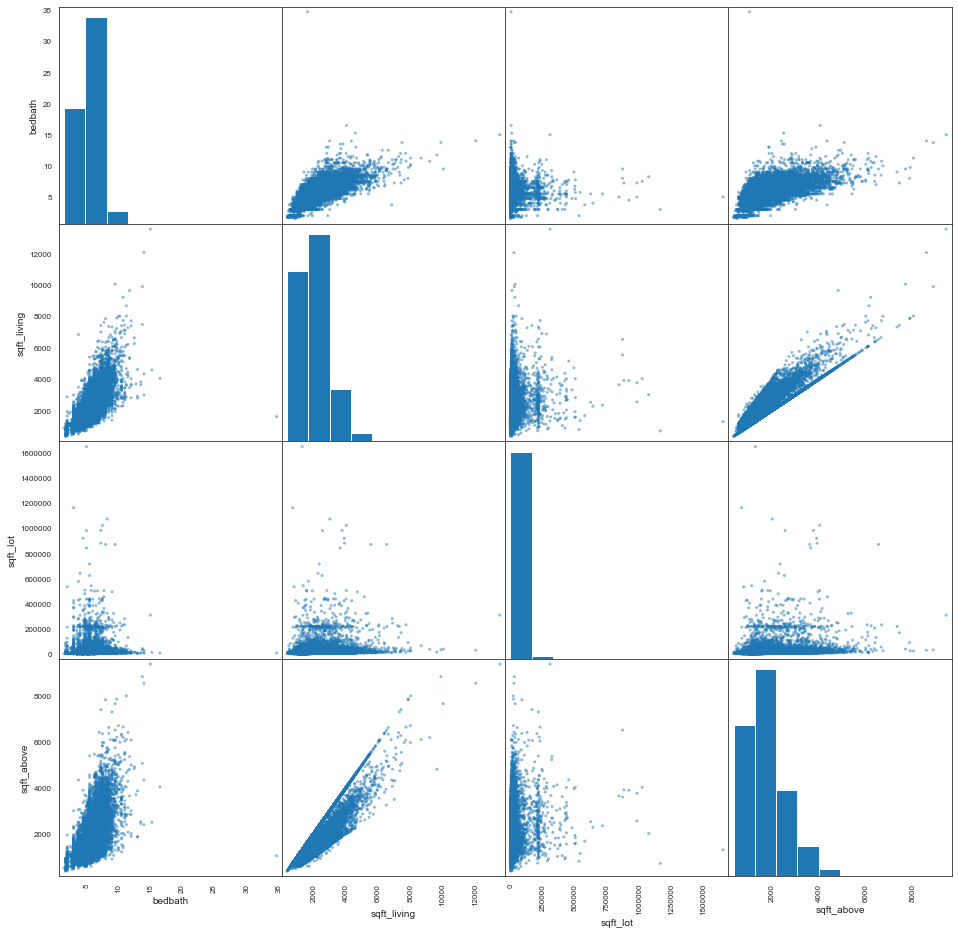

In [17]:
pd.plotting.scatter_matrix(data_pred, figsize =[16,16]);
plt.show() #Across all of these I am plotting a scatter matrix to look at the relationships across all features listed

In [18]:
data_pred.corr() # looking at the correlation to see relationships between them. 
#This correlation feature is probably what helps me to make my decisions on final 3 variables

,bedbath,sqft_living,sqft_lot,sqft_above
bedbath,1.000000,0.755961,0.066362,0.658030
sqft_living,0.755961,1.000000,0.173453,0.876448
sqft_lot,0.066362,0.173453,1.000000,0.184139
sqft_above,0.658030,0.876448,0.184139,1.000000


In [19]:
abs(data_pred.corr()) > 0.75 #Here I'm looking for the strongest relationships. I can see them in bedbath and square foot living. 
# I can also see a correlation between square foot above and square foot living. 

,bedbath,sqft_living,sqft_lot,sqft_above
bedbath,True,True,False,False
sqft_living,True,True,False,True
sqft_lot,False,False,True,False
sqft_above,False,True,False,True


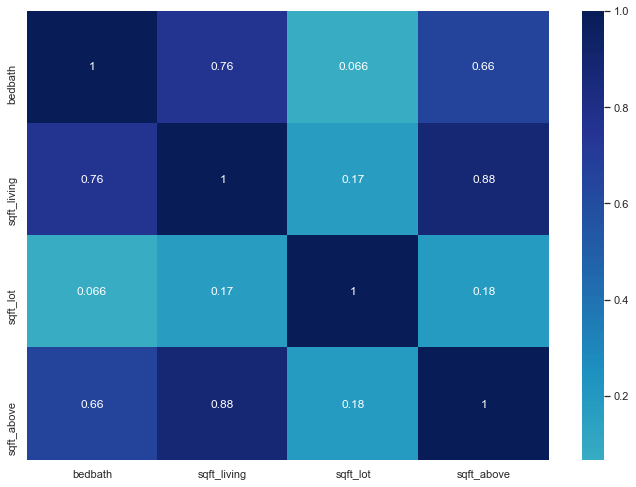

In [20]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data_pred.corr(), center=0,annot=True, cmap="YlGnBu")
plt.autoscale()
#I want to take the correlations and matrix from above to produce a heat map. 
#This will be better at representing the two steps done above. 

## I am now going to produce a model of ordinary least squares with the 6 variables before I produce a model of 3 strong features. From the OLS model I will get a sense of how strong the r-squared is and the coefficients. 

In [21]:
from statsmodels.formula.api import ols

In [22]:
outcome = 'price'
x_cols = ['bedbath','sqft_living','sqft_lot','sqft_above','sqft_basement']
predictors= '+'.join(x_cols)
formula = outcome + '~' + predictors
model =ols(formula=formula, data=data).fit()
model.summary()
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedbath
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,4.00
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,5.25
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,3.00
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7.00
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,5.00


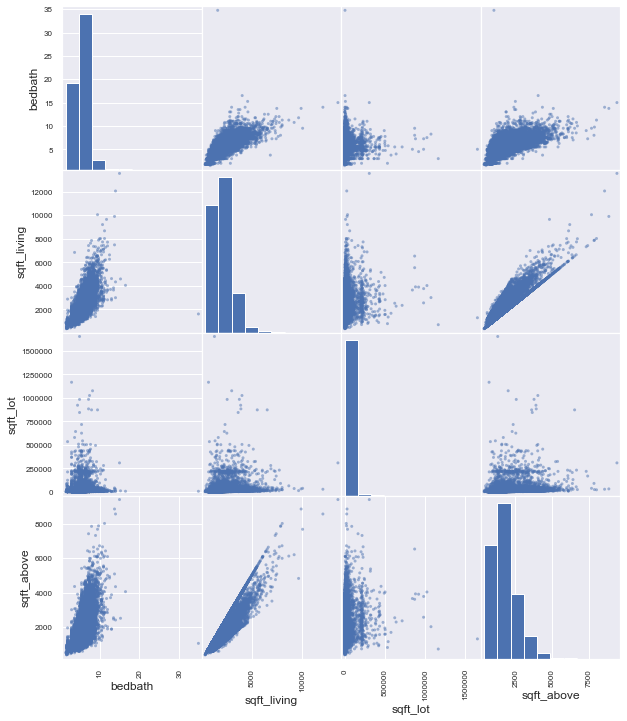

In [23]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));


In [24]:
from sklearn.linear_model import LinearRegression 

In [25]:
data = data[data.sqft_basement != '?'] #this line of code is important. Some of the square 
#foot basement is not listed on some of the houses in the data set, and for this reasons there is a question mark
# this line of code helps to avoid any errors being passed because our code is looking for int not strings. 

In [26]:
y = data['price']
data_pred = data[['bedbath','sqft_living','sqft_lot','sqft_above','sqft_basement']]
linreg = LinearRegression()
linreg.fit(data_pred, y) #not normalised yet, as you can see in output just below

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
import warnings
warnings.filterwarnings('ignore')

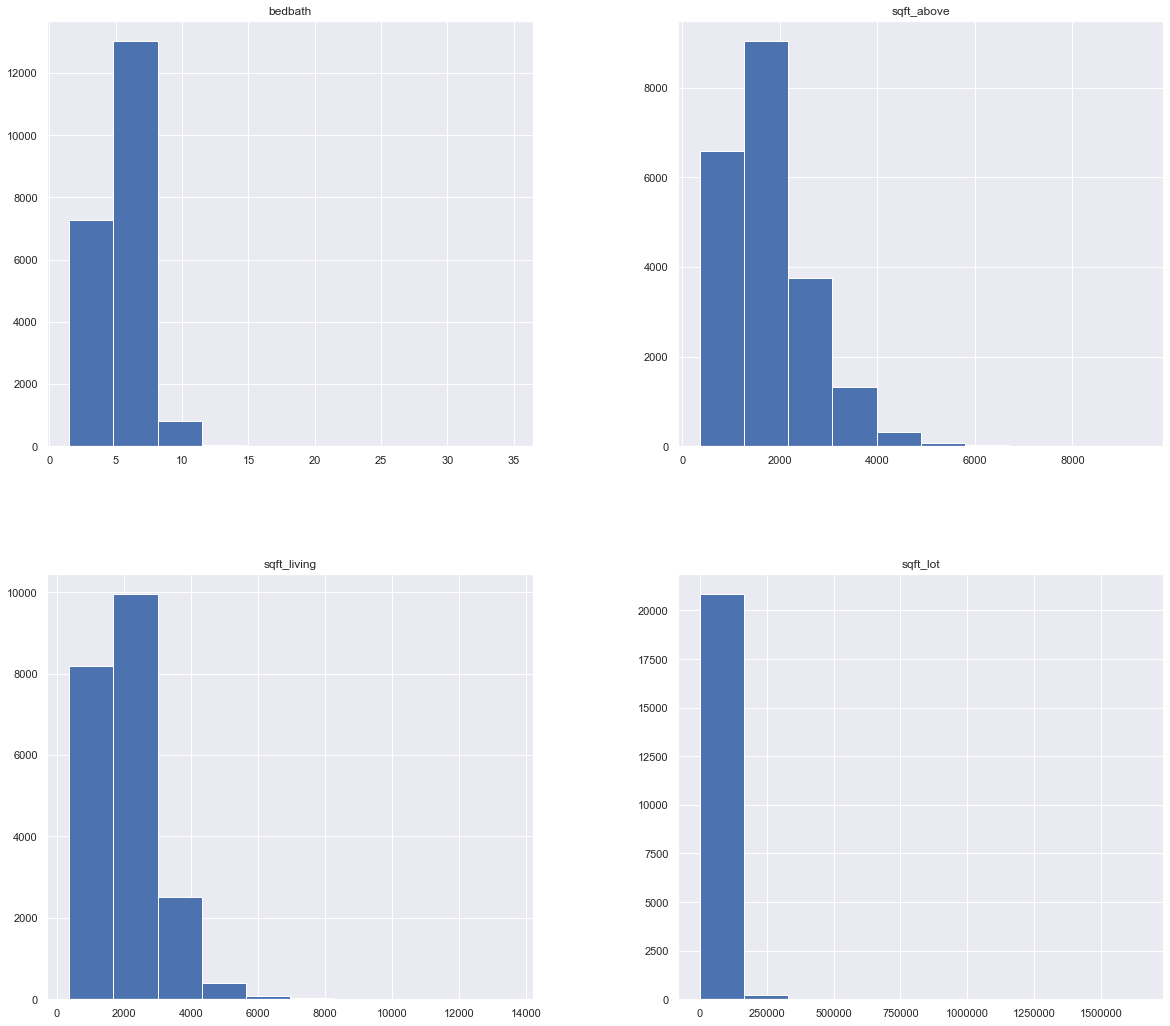

In [28]:
data_pred.hist(figsize = (20,18)); #not sure why basement isn't printed here

Again I want to look at the relationships via distribution and reg plots

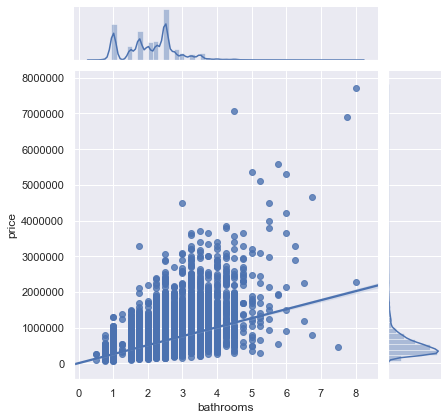

In [29]:
sns.jointplot('bathrooms','price', data=data, kind='reg');

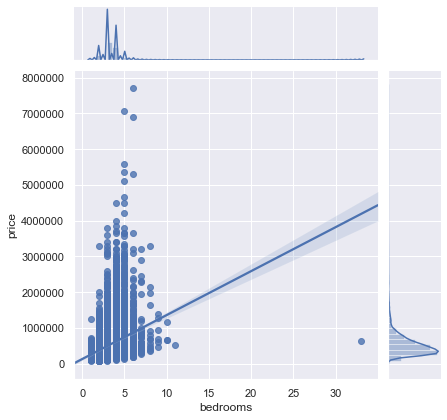

In [30]:
sns.jointplot('bedrooms','price', data=data, kind='reg');

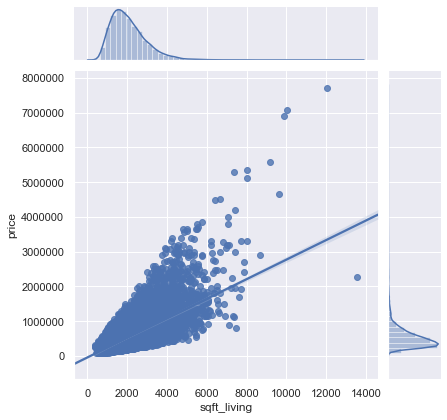

In [31]:
sns.jointplot('sqft_living','price', data=data, kind='reg');

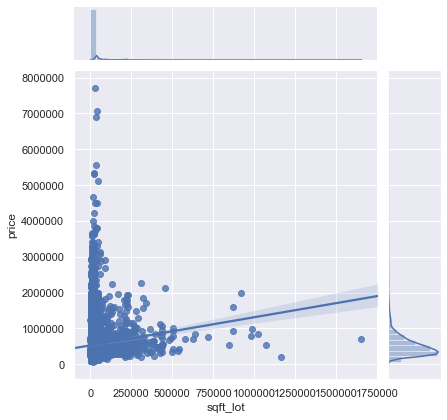

In [32]:
sns.jointplot('sqft_lot','price', data=data, kind='reg');

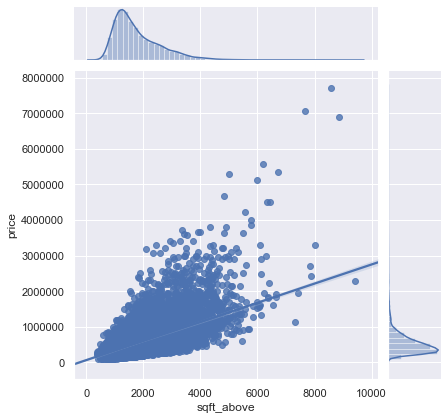

In [33]:
sns.jointplot('sqft_above','price', data=data, kind='reg');

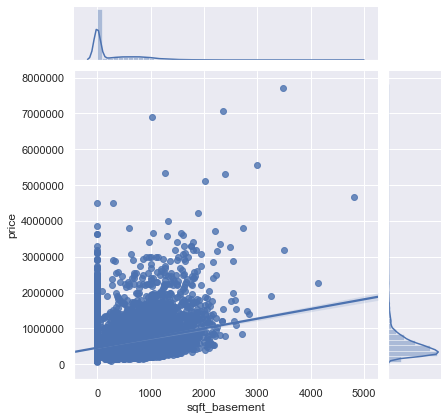

In [34]:

data['sqft_basement']=data['sqft_basement'].astype(float).astype(int) #i ran this without converting and was met with an error on its type
sns.jointplot('sqft_basement','price', data=data, kind='reg');

In [35]:
features = data[['bedbath','sqft_living','sqft_lot','sqft_above','sqft_basement']]
corr = features.corr()
corr

,bedbath,sqft_living,sqft_lot,sqft_above,sqft_basement
bedbath,1.000000,0.755797,0.066007,0.658015,0.337018
sqft_living,0.755797,1.000000,0.172941,0.876678,0.434576
sqft_lot,0.066007,0.172941,1.000000,0.183461,0.015533
sqft_above,0.658015,0.876678,0.183461,1.000000,-0.052293
sqft_basement,0.337018,0.434576,0.015533,-0.052293,1.000000


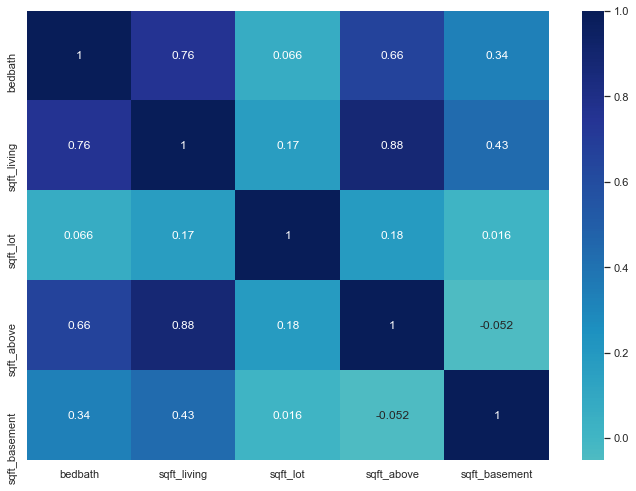

In [36]:
sns.heatmap(corr, center=0, annot=True,cmap="YlGnBu");
plt.autoscale()

# Final Model 
## Below I have chosen 3 coefficients for our final model and will explain the impact of price on houses within the dataset. Below I have repeated some of the steps so that you don't have to scroll up to check them.  

In [37]:
data = pd.read_csv('./raw_data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#We are looking at king county house list with it's features. As a business it's really important to separate the price from the features to be able to predict but also to see what aspects are the most important when it comes to building. purchasing and anythign else when it comes to buying a place to live.


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [39]:
data = data[data.sqft_basement != '?']

In [40]:
data['sqft_basement']=data['sqft_basement'].astype(float).astype(int)
#want to combine bathrooms with bedrooms
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [41]:
data['bedbath']=data['bedrooms']+data['bathrooms']


In [42]:
data['bedbath'].head()

0    4.00
1    5.25
2    3.00
3    7.00
4    5.00
Name: bedbath, dtype: float64

In [43]:
data['bedbath'].describe()

count    21143.000000
mean         5.488637
std          1.475335
min          1.500000
25%          4.500000
50%          5.500000
75%          6.500000
max         34.750000
Name: bedbath, dtype: float64

In [44]:
x = features
y = 'price'

In [45]:
outcome = 'price'
x_cols = ['bedbath', 'sqft_living','sqft_lot','sqft_above','sqft_basement']

In [46]:
data.columns = [col.replace(' ', '_') for col in data.columns]
for col in features:
    data[col] = (data[col] - data[col].mean())/data[col].std()
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedbath
0,7129300520,10/13/2014,221900.0,3,1.00,-0.980810,-0.229006,1.0,NaN,0.0,...,-0.735227,-0.659554,1955,0.0,98178,47.5112,-122.257,1340,5650,-1.009016
1,6414100192,12/9/2014,538000.0,3,2.25,0.532448,-0.190373,2.0,0.0,0.0,...,0.459834,0.244404,1951,1991.0,98125,47.7210,-122.319,1690,7639,-0.161751
2,5631500400,2/25/2015,180000.0,2,1.00,-1.427167,-0.123447,1.0,0.0,0.0,...,-1.230151,-0.659554,1933,NaN,98028,47.7379,-122.233,2720,8062,-1.686828
3,2487200875,12/9/2014,604000.0,4,3.00,-0.131643,-0.244779,1.0,0.0,0.0,...,-0.892154,1.396951,1965,0.0,98136,47.5208,-122.393,1360,5000,1.024420
4,1954400510,2/18/2015,510000.0,3,2.00,-0.436472,-0.170038,1.0,0.0,0.0,...,-0.131661,-0.659554,1987,0.0,98074,47.6168,-122.045,1800,7503,-0.331204


In [47]:
from scipy import stats
stats.zscore(features) #looking at the zscores. above i have converted the set into z-scores.

array([[-1.00904008, -0.9808333 , -0.22901102, -0.73524412, -0.65957   ],
       [-0.16175482,  0.53246109, -0.19037796,  0.45984489,  0.24440958],
       [-1.68686828, -1.42720071, -0.12344957, -1.23017997, -0.65957   ],
       ...,
       [-1.85632533, -1.15502546, -0.33335912, -0.92838982, -0.65957   ],
       [ 0.00770223, -0.52357888, -0.30816997, -0.22823666, -0.65957   ],
       [-1.85632533, -1.15502546, -0.34000828, -0.92838982, -0.65957   ]])

Here, it is important to note that I do not really need a z-score of an id, date, price, zipcode, latitude, or longitude. 

In [48]:
from statsmodels.formula.api import ols

In [49]:
predictors = '+'.join(x_cols)
formula = y + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     5389.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:44:23   Log-Likelihood:            -2.9354e+05
No. Observations:               21143   AIC:                         5.871e+05
Df Residuals:                   21138   BIC:                         5.871e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.405e+05   1781.354    303.427      0.000    5.37e+05    5.44e+05
bedbath       -5.668e+04   2734.374    -20.730      0.000    -6.2e+04   -5.13e+04
sqft_living    1.555e+05   1416.008    109.850      0.000    1.53e+05    1.58e+05
sqft_lot      -1.598e+04   1821.803     -8.774      0.000   -1.96e+04   -1.24e+04
sqft_above     1.307e+05   1461.692     89.413      0.000    1.28e+05    1.34e+05
sqft_basement  7.822e+04   1684.980     46.419      0.000    7.49e+04    8.15e+04
==============================================================================
Omnibus:                    13977.452   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           471585.213
Skew:                           2.697   Prob(JB):                         0.00
Kurtosis:                      25.499   Cond. No.                     3.47e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.7e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Above I can see that the r squared looks pretty good. When I dive deeper into the p values and coefficients I start to see a lot of irregularities. This does not seem to be as strong when looking at each predictor individually. It's also important to note that coefficients are negative because I have converted these variables into z-scores above.


#From the above, I want to define what I believe to be the strongest predictors for house prices. Below will be a process of trial and error with predictors

In [50]:
#Let's refine it. 
y = 'price'
x_cols = ['bedbath','sqft_living','sqft_lot','floors','sqft_above','sqft_basement']
predictors = '+'.join(x_cols)
formula = y + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     4335.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:44:23   Log-Likelihood:            -2.9351e+05
No. Observations:               21143   AIC:                         5.870e+05
Df Residuals:                   21137   BIC:                         5.871e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.932e+05   6401.795     77.035      0.000    4.81e+05    5.06e+05
bedbath       -6.089e+04   2784.750    -21.866      0.000   -6.63e+04   -5.54e+04
sqft_living    1.541e+05   1427.205    107.945      0.000    1.51e+05    1.57e+05
sqft_lot      -1.452e+04   1829.144     -7.941      0.000   -1.81e+04   -1.09e+04
floors          3.17e+04   4117.373      7.699      0.000    2.36e+04    3.98e+04
sqft_above     1.258e+05   1589.481     79.177      0.000    1.23e+05    1.29e+05
sqft_basement   8.42e+04   1853.226     45.432      0.000    8.06e+04    8.78e+04
==============================================================================
Omnibus:                    14140.422   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           493452.603
Skew:                           2.733   Prob(JB):                         0.00
Kurtosis:                      26.027   Cond. No.                     3.87e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  5e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
X = data[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedbath', 2.3633913952355154),
 ('sqft_living', inf),
 ('sqft_lot', 1.0467567414781),
 ('floors', 1.0430657635012799),
 ('sqft_above', inf),
 ('sqft_basement', inf)]

## I have combined bedbath and square foot living. As stated about with regards to converting the columns in to z-scores we can say that for every 1 unit change in your independent var where the unit is a st dev. Change in independent variable, your dependent var will change by the coeficient amount. 

In [53]:
y = 'price'
x_cols = ['bedbath','sqft_living',]
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                 1.068e+04
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:44:23   Log-Likelihood:            -2.9359e+05
No. Observations:               21143   AIC:                         5.872e+05
Df Residuals:                   21140   BIC:                         5.872e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.405e+05   1785.491    302.724      0.000    5.37e+05    5.44e+05
bedbath      -5.41e+04   2726.814    -19.841      0.000   -5.94e+04   -4.88e+04
sqft_living  2.994e+05   2726.814    109.799      0.000    2.94e+05    3.05e+05
==============================================================================
Omnibus:                    14108.498   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           485398.387
Skew:                           2.729   Prob(JB):                         0.00
Kurtosis:                      25.830   Cond. No.                         2.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

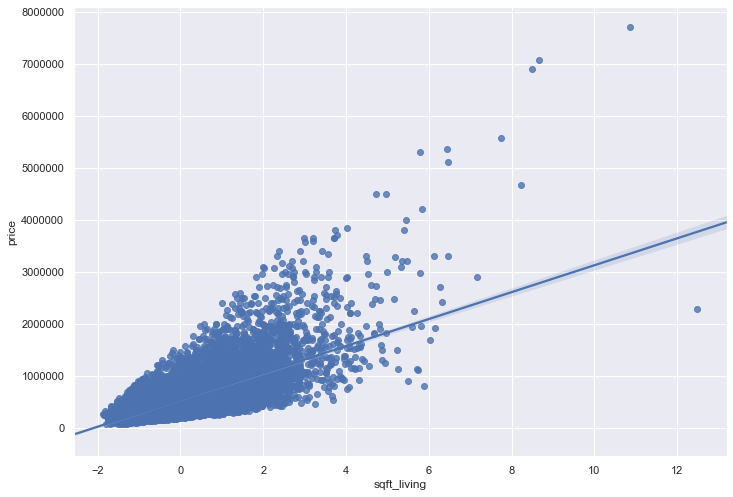

In [54]:
sns.regplot(x='sqft_living', y='price',data=data); #checking for homoscedasticity. This figure below represents 


In order for our model to be best represented we should also have a look at it's residual.

In [55]:
import statsmodels.api as sm
import scipy.stats as stats

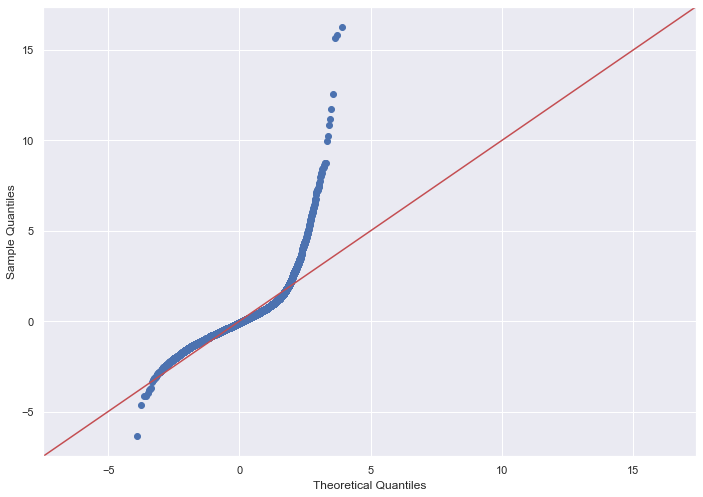

In [56]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Here it does not look as though there is a clear relationship, this is partly due to it not being normalised. 

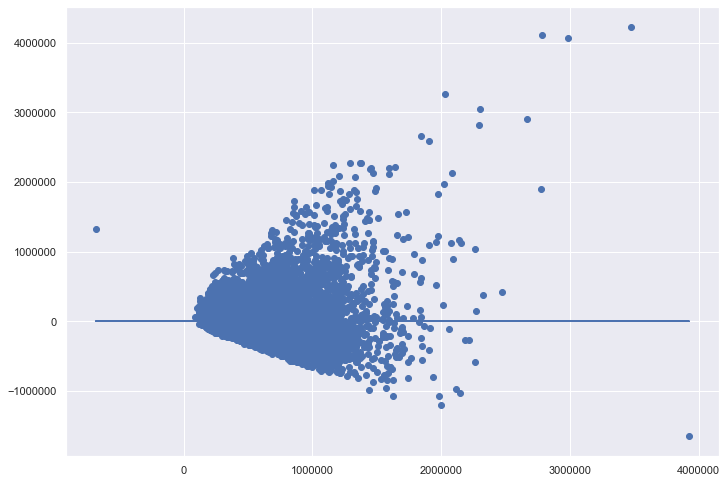

In [57]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))]) # Here I am tweeking out model to be more homoscedastic.
#It is important to note that homoscedasticity cannot be achieved within the housing market. This is because there is an inconstant variance across
#All variables. 

This is heteroscedastic...I know this is not a good sign. 

In [58]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, data['price'].quantile(q=q))) # part of the refitting

0.9 percentile: 888998.0
0.91 percentile: 920000.0
0.92 percentile: 950000.0
0.93 percentile: 998000.0
0.94 percentile: 1070000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1400000.0
0.98 percentile: 1600000.0


In [59]:
subset = data[data['price'] < 1260000.0]
print('Percent removed:',(len(data) - len(subset))/len(data))
outcome = 'price'
x_cols = ['bedbath', 'sqft_living']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=subset).fit()
model.summary()

Percent removed: 0.04024972804237809


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     7102.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:44:26   Log-Likelihood:            -2.7330e+05
No. Observations:               20292   AIC:                         5.466e+05
Df Residuals:                   20289   BIC:                         5.466e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.022e+05   1207.570    415.882      0.000       5e+05    5.05e+05
bedbath     -2.182e+04   1878.224    -11.620      0.000   -2.55e+04   -1.81e+04
sqft_living   1.82e+05   2071.778     87.862      0.000    1.78e+05    1.86e+05
==============================================================================
Omnibus:                     1539.437   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2030.286
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                       3.778   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Although our r squared has gone down, we have created a more normal model.

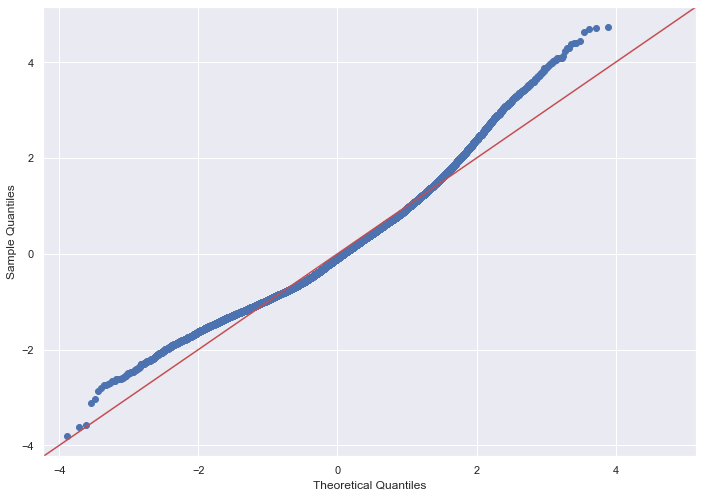

In [60]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

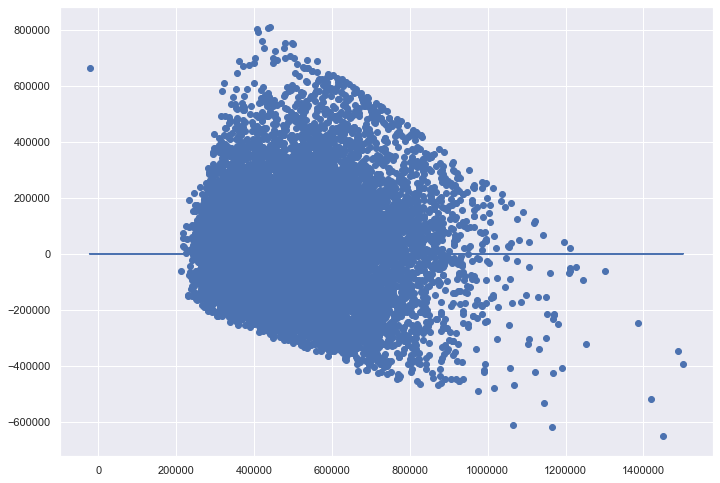

In [61]:
plt.scatter(model.predict(subset[x_cols]), model.resid)
plt.plot(model.predict(subset[x_cols]), [0 for i in range(len(subset))])

This is as homoscedastic as it will get given the OLS was used to reduce forecasted errors in our model. This also helps to give a lower standard deviation